# News Categorization - MNC Portal

Text classification of MNC news portal based on tagging dataset.

# Table of Contents

1. Introduction
2. External Links
3. Working Area
    3.1 Import Libraries

    3.2 Data Loading

    3.3 Exploratory Data Analysis (EDA)

    3.4 Data Preprocessing

    3.5 Modeling

    3.6 Model Evaluation
    
4. Conclusion / Overall Analysis

# 1. Introduction

Name : Reza Ismail Hasan
Class : HCK-01

### 1.1. Brief Description

On a news portal website, of course, it presents various types of articles. Of course, we can see that the articles on the website are divided into several categories (for example entertainment, politics, technology, etc). Currently, the news articles are classified by hand by the content managers of news websites. But to save time, they can also implement a machine learning model on their websites that read the news headline or the content of the news and classifies the category of the news.

### 1.2. Problem Statement

Implementing a deep learning model to classify category of the news portal using MNC dataset.

# 2. External Links

Deployment link : 

# 3. Working Area

### 3.1 Import Libraries

These are libraries that are used in this assignment:

- pandas : Used to load and process data

- numpy : Used to do mathematical calculation necessary in the data analysis

- matplotlib : Used to visualize data

- seaborn : Used to do an alternative data visualization

- sklearn : Used to do machine learning procedure

- json : used to load json data type

- pickle : used to create .pkl file for deployment

- scipy.stats : Used to do statistical calculation

- warnings : Used to ignore any warning

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.tokenize import word_tokenize
import string
import json
import re
import warnings
import ast

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
layers = keras.layers
models = keras.models


### 3.2 Data Loading

We have been provided with 1 dataset . The description for what the dataset contain is given below: 

| **Variable**      | **Description**                                                                                            |
|-------------------|------------------------------------------------------------------------------------------------------------|
| viewers_id        | contained information about viewers_id. There are several ids using UN- and using dynamic number generated |
| content_id        | contained information about content_id. The ids are using dynamic number generated                         |
| hit_timestamp     | contained information describes the time viewers carry out the process of reading per one article          |
| user_type         | describe user type based on registered user and anonymous user or unregistered                             |
| category_id       | contained information about category_id. The ids are using dynamic number generated                        |
| tagging           | describe the tagging per content_id                                                                        |
| creator_id        | describe content owner                                                                                     |
| category_name     | describe the category name                                                                                 |
| viewers_birthdate | describe the birthdate of viewers                                                                          |
| viewers_gender    | describe the gender of viewers                                                                             |
| viewers_region    | describe the region of viewers                                                                             |

In [2]:
# Loading Data
df = pd.read_csv('final data.csv')

In [4]:
# Duplicate Dataset
df_copy = df.copy()

In [5]:
# Checking the shape of the dataset
df.shape

(958547, 12)

this dataset has 958547 row and 12 column

In [6]:
# Look at the first 5 rows
df_copy.head(5)

Unnamed: 0  viewers_id content_id hit_timestamp      user_type  \
0           0  UN-RY8dNmQ     OC0RuX    2022-07-30  Anonymus User   
1           1  UN-RY8dNmQ     OC0RuX    2022-07-30  Anonymus User   
2           2  UN-b1g5Cc6     EsWkCd    2022-07-31  Anonymus User   
3           3  UN-b1g5Cc6     EsWkCd    2022-07-31  Anonymus User   
4           4  UN-kNqX0xJ     WMKZwi    2022-07-31  Anonymus User   

   category_id                                            tagging creator_id  \
0         23.0  [{"tag_id": "l33saH", "tag_name": "nathalie-ho...     99jY83   
1         23.0  [{"tag_id": "l33saH", "tag_name": "nathalie-ho...     99jY83   
2         23.0  [{"tag_id": "Tw9Th4", "tag_name": "deddy-corbu...     99jY83   
3         23.0  [{"tag_id": "Tw9Th4", "tag_name": "deddy-corbu...     99jY83   
4         23.0  [{"tag_id": "MSDG2f", "tag_name": "valencia-ta...     99jY83   

  category_name viewers_birthdate viewers_gender viewers_region  
0       Hiburan               NaN            NaN            NaN  
1       Hiburan               NaN            NaN            NaN  
2       Hiburan               NaN            NaN            NaN  
3       Hiburan               NaN            NaN            NaN  
4       Hiburan               NaN            NaN            NaN

In [8]:
# Look at the last 5 rows
df_copy.tail(5)

Unnamed: 0  viewers_id content_id hit_timestamp      user_type  \
958542      958542      KTq08K     1BZ98E    2022-08-29  Register User   
958543      958543  UN-eRISZYj     1BZ98E    2022-08-29  Anonymus User   
958544      958544      KTq08K     1BZ98E    2022-08-29  Register User   
958545      958545  UN-DHiHLsN     bDrGRd    2022-08-12  Anonymus User   
958546      958546  UN-DHiHLsN     bDrGRd    2022-08-12  Anonymus User   

        category_id                                            tagging  \
958542         13.0                                                NaN   
958543         13.0                                                NaN   
958544         13.0                                                NaN   
958545         13.0  [{"tag_id": "D5mK4C", "tag_name": "dunia-polit...   
958546         13.0  [{"tag_id": "D5mK4C", "tag_name": "dunia-polit...   

       creator_id category_name viewers_birthdate viewers_gender  \
958542     39jZ02         Humor        1987-11-05           Male   
958543     39jZ02         Humor               NaN            NaN   
958544     39jZ02         Humor        1987-11-05           Male   
958545     99jY83         Humor               NaN            NaN   
958546     99jY83         Humor               NaN            NaN   

       viewers_region  
958542        Jakarta  
958543            NaN  
958544        Jakarta  
958545            NaN  
958546            NaN

In [9]:
# Look at overall dataframe information
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958547 entries, 0 to 958546
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         958547 non-null  int64  
 1   viewers_id         958547 non-null  object 
 2   content_id         958547 non-null  object 
 3   hit_timestamp      958547 non-null  object 
 4   user_type          958547 non-null  object 
 5   category_id        958547 non-null  float64
 6   tagging            920275 non-null  object 
 7   creator_id         958547 non-null  object 
 8   category_name      958547 non-null  object 
 9   viewers_birthdate  4115 non-null    object 
 10  viewers_gender     4115 non-null    object 
 11  viewers_region     3988 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 87.8+ MB


- There are 'unnamed: 0' column, it seem like it's a duplicated column from the index of the dataframe. 
- There are missing value at tagging, viewers_birthdate, viewers_gender and viewers region. We can conclude that not all the articles are tagged and majority of the website visitor is not registerd users.

### Exploratory data Analysis

#### User Type

In [10]:
# Checking unique value of user_type
df.user_type.unique()

array(['Anonymus User', 'Register User'], dtype=object)

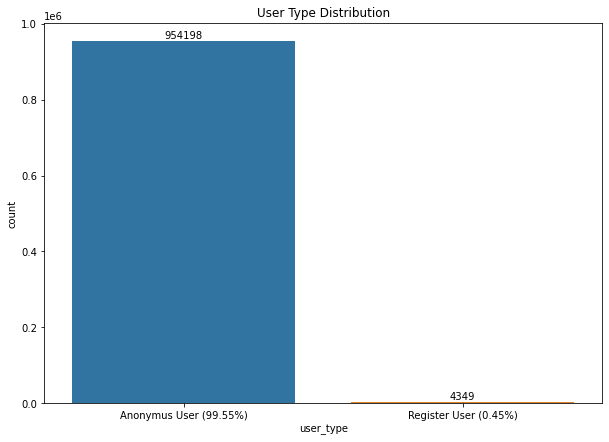

In [12]:
plt.figure(figsize=(10,7))

_ = sns.countplot(x=df_copy['user_type'])
_.bar_label(_.containers[0]);

pct_0 = df_copy['user_type'].value_counts()[0]*100 / df_copy.shape[0]

_.set_xticklabels([f'Anonymus User ({pct_0:.2f}%)', f'Register User ({100-pct_0:.2f}%)']);
_.set_title(f'User Type Distribution')

plt.tight_layout;

We can see to above graph, Majority is Anonymus User and only 0,45% traffic is from the registered user.

#### Category Name

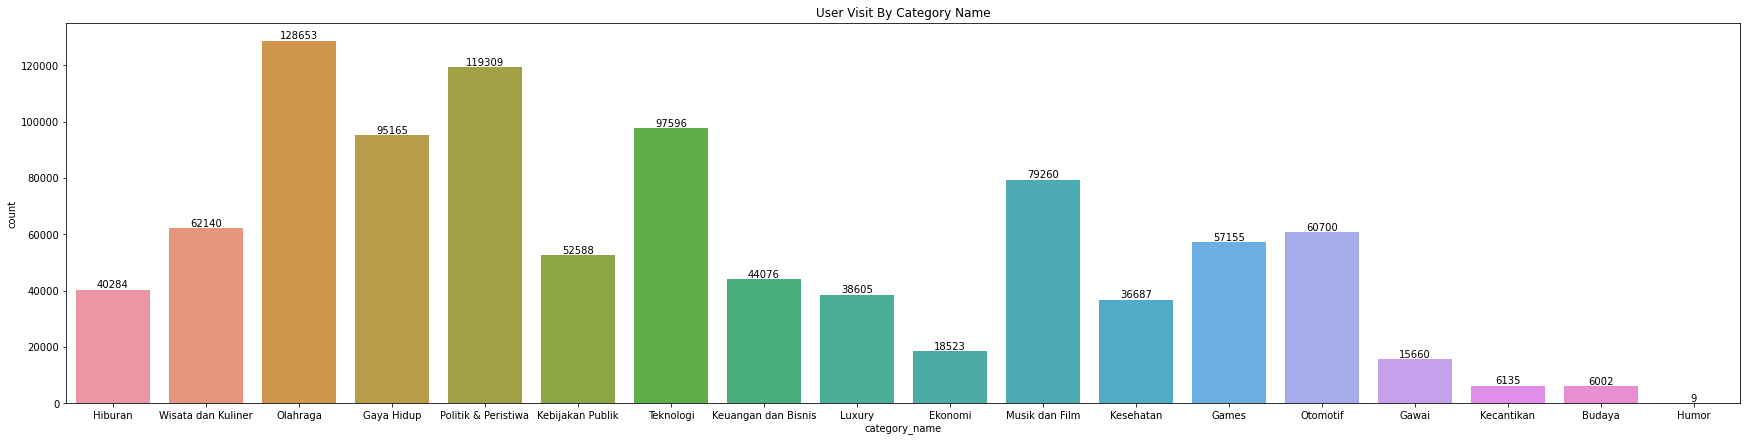

In [13]:
plt.figure(figsize=(30,7))

_ = sns.countplot(x=df_copy['category_name'])
_.bar_label(_.containers[0]);

_.set_title(f'User Visit By Category Name')

plt.tight_layout;

As we can see above Olahraga/sports category has the most high traffic in this website while the humor category only brought in 9 visitors. 

#### Numbers of visitor by Region

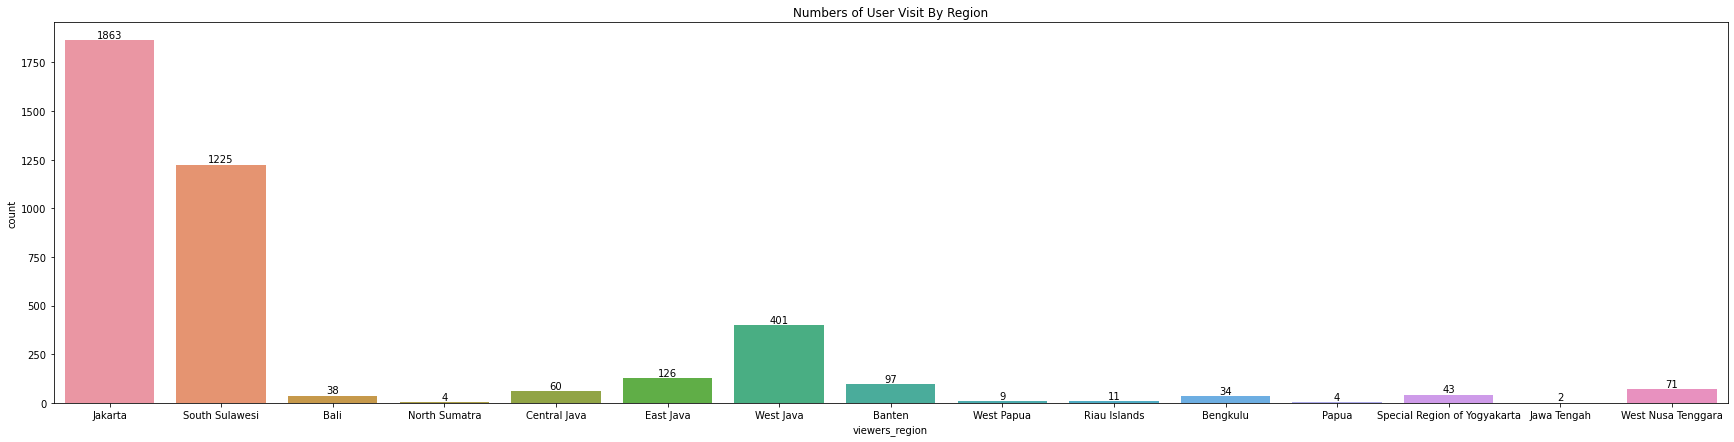

In [14]:
plt.figure(figsize=(30,7))

_ = sns.countplot(x=df_copy['viewers_region'])
_.bar_label(_.containers[0]);

_.set_title(f'Numbers of User Visit By Region')

plt.tight_layout;


if we review from registered users. We can see that the city of Jakarta still dominates because of the large number of internet users, but South Sulawesi also has the potential for a large number of viewers on the MNC portal.

#### Tagging

In [16]:
# look at first row of tagging collumn
df_copy.tagging[0]

'[{"tag_id": "l33saH", "tag_name": "nathalie-holscher", "tag_slug": "nathalie-holscher", "status": 1, "created": {"$date": "2021-11-22T02:32:04.404Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 2}, {"tag_id": "n3X0Hm", "tag_name": "sidang-cerai-nathalie-holscher", "tag_slug": "sidang-cerai-nathalie-holscher", "status": 1, "created": {"$date": "2022-07-15T08:40:23.444Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 2}, {"tag_id": "EiUKlV", "tag_name": "perceraian-nathalie-holscher", "tag_slug": "perceraian-nathalie-holscher", "status": 1, "created": {"$date": "2022-07-07T04:15:45.332Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroundimage": "", "tumbimage": "", "source": 2}, {"tag_id": "eK7aRP", "tag_name": "sule", "tag_slug": "sule", "status": 1, "created": {"$date": "2022-07-18T23:53:06.557Z"}, "updateat": {"$date": "0001-01-03T00:00:00.000Z"}, "backgroun

it seems that contain dictionary inside list data type, which the data itself is embedded in a string. That contains so many information, to make it easier to review the values ​​in that column I use the json library to extract the data. 

In [18]:
data = json.loads(df_copy['tagging'][0])
data

[{'tag_id': 'l33saH',
  'tag_name': 'nathalie-holscher',
  'tag_slug': 'nathalie-holscher',
  'status': 1,
  'created': {'$date': '2021-11-22T02:32:04.404Z'},
  'updateat': {'$date': '0001-01-03T00:00:00.000Z'},
  'backgroundimage': '',
  'tumbimage': '',
  'source': 2},
 {'tag_id': 'n3X0Hm',
  'tag_name': 'sidang-cerai-nathalie-holscher',
  'tag_slug': 'sidang-cerai-nathalie-holscher',
  'status': 1,
  'created': {'$date': '2022-07-15T08:40:23.444Z'},
  'updateat': {'$date': '0001-01-03T00:00:00.000Z'},
  'backgroundimage': '',
  'tumbimage': '',
  'source': 2},
 {'tag_id': 'EiUKlV',
  'tag_name': 'perceraian-nathalie-holscher',
  'tag_slug': 'perceraian-nathalie-holscher',
  'status': 1,
  'created': {'$date': '2022-07-07T04:15:45.332Z'},
  'updateat': {'$date': '0001-01-03T00:00:00.000Z'},
  'backgroundimage': '',
  'tumbimage': '',
  'source': 2},
 {'tag_id': 'eK7aRP',
  'tag_name': 'sule',
  'tag_slug': 'sule',
  'status': 1,
  'created': {'$date': '2022-07-18T23:53:06.557Z'},
  '

As we can see above, we can conclude that 1 article can contains many tagging properties. in the next steps I will process the tagging data into a new column by taking only the tag_name value.

### Data Cleaing & Preprocessing

We would make text categorization model based on tagging data, so we only need two variable :

1. `tag_name`
2. `category_name` (for the target label)

In [132]:
df_new = df_copy[['tagging','category_name']]

In [82]:
#Check duplicated data
df_new.duplicated().sum()

939580

Since we have visitor trafic data, ff course we have a lot of duplicate data. Therefore we remove duplicate data to be used into the model.

In [133]:
df_new.drop_duplicates(inplace=True)

/var/folders/td/1cyzh0x170g2j4h42jc9l3ww0000gp/T/ipykernel_45239/3069802320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop_duplicates(inplace=True)


In [73]:
#Check duplicated data
df_new.duplicated().sum()

0

In [84]:
#Checking missing value
df_new.isnull().sum()

tagging          18
category_name     0
category_id       0
dtype: int64

after we remove duplicated data we still have missing value on tagging column. Since we need tagging data to make text categorization so we can drop the missing value.

In [134]:
df_new.dropna(inplace=True)

/var/folders/td/1cyzh0x170g2j4h42jc9l3ww0000gp/T/ipykernel_45239/420984286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


In [86]:
#resetting index after data cleaning
df_new.reset_index(inplace=True, drop=True)
df_new

tagging category_name  \
0      [{"tag_id": "l33saH", "tag_name": "nathalie-ho...       Hiburan   
1      [{"tag_id": "Tw9Th4", "tag_name": "deddy-corbu...       Hiburan   
2      [{"tag_id": "MSDG2f", "tag_name": "valencia-ta...       Hiburan   
3      [{"tag_id": "rQn4Gq", "tag_name": "raffi-ahmad...       Hiburan   
4      [{"tag_id": "A7hdu3", "tag_name": "artis-indon...       Hiburan   
...                                                  ...           ...   
18944  [{"tag_id": "rrwF3m", "tag_name": "kecantikan"...        Budaya   
18945  [{"tag_id": "zyM8WJ", "tag_name": "nabi yusuf ...        Budaya   
18946  [{"tag_id": "y34OrK", "tag_name": "andy-serkis...         Humor   
18947  [{"tag_id": "7aMKes", "tag_name": "contoh-teks...         Humor   
18948  [{"tag_id": "D5mK4C", "tag_name": "dunia-polit...         Humor   

       category_id  
0             23.0  
1             23.0  
2             23.0  
3             23.0  
4             23.0  
...            ...  
18944         20.0  
18945         20.0  
18946         13.0  
18947         13.0  
18948         13.0  

[18949 rows x 3 columns]

In [135]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18949 entries, 0 to 958545
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tagging        18949 non-null  object
 1   category_name  18949 non-null  object
dtypes: object(2)
memory usage: 444.1+ KB


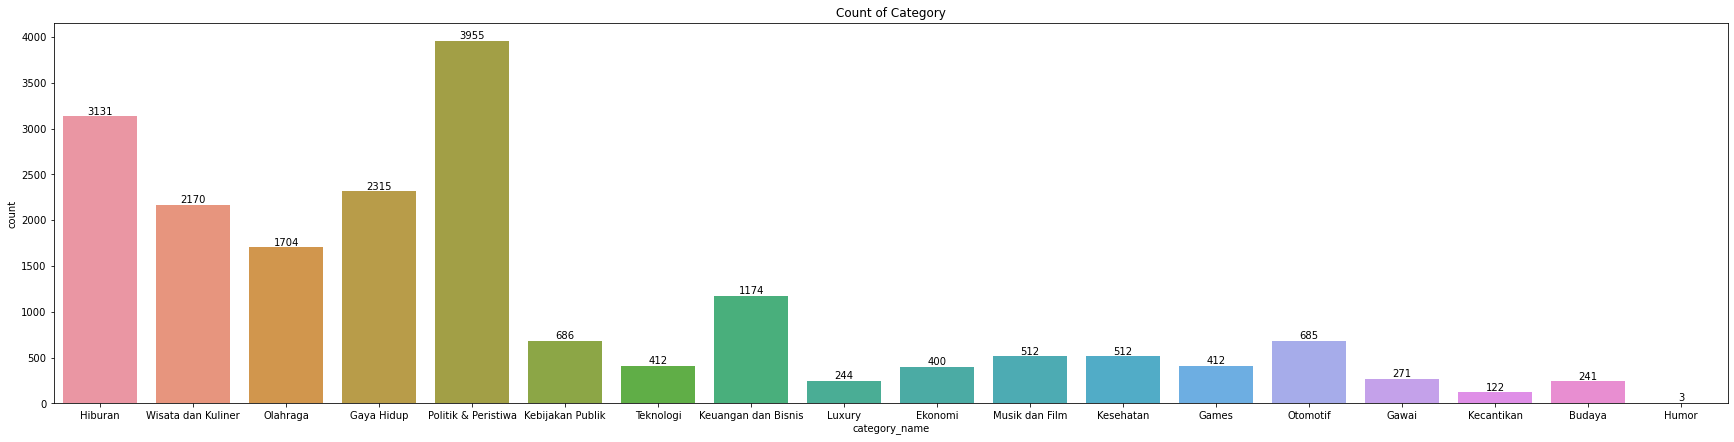

In [136]:
plt.figure(figsize=(30,7))

_ = sns.countplot(x=df_new['category_name'])
_.bar_label(_.containers[0]);

_.set_title(f'Count of Category')

plt.tight_layout;

In [137]:
df_new1 = df_new.query("category_name == ['Hiburan', 'Wisata dan Kuliner', 'Olahraga', 'Gaya Hidup', 'Politik & Peristiwa', 'Keuangan dan Bisnis']")
df_new1.head()

tagging category_name
0  [{"tag_id": "l33saH", "tag_name": "nathalie-ho...       Hiburan
2  [{"tag_id": "Tw9Th4", "tag_name": "deddy-corbu...       Hiburan
4  [{"tag_id": "MSDG2f", "tag_name": "valencia-ta...       Hiburan
6  [{"tag_id": "rQn4Gq", "tag_name": "raffi-ahmad...       Hiburan
8  [{"tag_id": "A7hdu3", "tag_name": "artis-indon...       Hiburan

In [138]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14449 entries, 0 to 639809
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tagging        14449 non-null  object
 1   category_name  14449 non-null  object
dtypes: object(2)
memory usage: 338.6+ KB


#### Extracting tagging data

As I mentioned on previous step, I will process the tagging data into a new column by taking only the tag_name value.

In [139]:
df_new1['tag_name'] = ''
i = 0
for item in df_new1[['tagging']].values:
    for tag in item:
        tag = ast.literal_eval(tag)
        name = []
        for data in tag:
            name.append(data['tag_name'])
            a = ' , '.join(name)
        df_new1['tag_name'][i] = a
        i=i+1
df_new1.head()

/var/folders/td/1cyzh0x170g2j4h42jc9l3ww0000gp/T/ipykernel_45239/3646525957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['tag_name'] = ''
/var/folders/td/1cyzh0x170g2j4h42jc9l3ww0000gp/T/ipykernel_45239/3646525957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['tag_name'][i] = a
/var/folders/td/1cyzh0x170g2j4h42jc9l3ww0000gp/T/ipykernel_45239/3646525957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

tagging category_name  \
0  [{"tag_id": "l33saH", "tag_name": "nathalie-ho...       Hiburan   
2  [{"tag_id": "Tw9Th4", "tag_name": "deddy-corbu...       Hiburan   
4  [{"tag_id": "MSDG2f", "tag_name": "valencia-ta...       Hiburan   
6  [{"tag_id": "rQn4Gq", "tag_name": "raffi-ahmad...       Hiburan   
8  [{"tag_id": "A7hdu3", "tag_name": "artis-indon...       Hiburan   

                                            tag_name  
0  nathalie-holscher , sidang-cerai-nathalie-hols...  
2  valencia-tanoesoedibjo , indonesian-comedy-awa...  
4  artis-indonesia-mirip-bintang-bollywood , arti...  
6  putri-candrawathi , irjen-ferdy-sambo , ferdy-...  
8              film barat , adegan film , film sadis

In [140]:
def text_proses(teks):
    teks = teks.lower()
    teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention
    teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
    teks = re.sub(r"\\n"," ",teks) #Menghilangkan \n
    teks = teks.strip() #Menghilangkan Whitespace
    teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link
    teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link
    teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf
    teks = re.sub(r"\d+", " ", teks) #Menghilangkan Numerik
    tokens = word_tokenize(teks)
    return teks

In [142]:
# Aplicating all Preprocessing technique to all Documents in tag_name column

df_new1['tag_name'] = df_new1['tag_name'].apply(lambda x: text_proses(x))
df_new1.head(5)

/var/folders/td/1cyzh0x170g2j4h42jc9l3ww0000gp/T/ipykernel_45239/1896793300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['tag_name'] = df_new1['tag_name'].apply(lambda x: text_proses(x))


tagging category_name  \
0  [{"tag_id": "l33saH", "tag_name": "nathalie-ho...       Hiburan   
2  [{"tag_id": "Tw9Th4", "tag_name": "deddy-corbu...       Hiburan   
4  [{"tag_id": "MSDG2f", "tag_name": "valencia-ta...       Hiburan   
6  [{"tag_id": "rQn4Gq", "tag_name": "raffi-ahmad...       Hiburan   
8  [{"tag_id": "A7hdu3", "tag_name": "artis-indon...       Hiburan   

                                            tag_name  
0  nathalie holscher   sidang cerai nathalie hols...  
2  valencia tanoesoedibjo   indonesian comedy awa...  
4  artis indonesia mirip bintang bollywood   arti...  
6  putri candrawathi   irjen ferdy sambo   ferdy ...  
8              film barat   adegan film   film sadis

### Data preparation
There's some work to be done in order for our data to be ready for training: 

1. First we'll split the data into training and test sets.

2. Then we'll tokenize the words (text), and then convert them to a numbered index.

3. Next we'll do the same for the labels (categories), by using the LabelEncoder utility.

4. Finally, we'll convert the labels to a one-hot representation.

In [173]:

x = df_new1['tag_name']
y = df_new1['category_name']

In [174]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

10114
4335


In [175]:
max_words = 100
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False)

In [176]:
tokenize.fit_on_texts(x_train) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(x_train)
x_test = tokenize.texts_to_matrix(x_test)

In [177]:
y_train.unique()

array(['Gaya Hidup', 'Wisata dan Kuliner', 'Hiburan',
       'Keuangan dan Bisnis', 'Politik & Peristiwa', 'Olahraga'],
      dtype=object)

In [158]:
y_test.unique()

array(['Hiburan', 'Politik & Peristiwa', 'Olahraga', 'Wisata dan Kuliner',
       'Gaya Hidup', 'Keuangan dan Bisnis'], dtype=object)

In [178]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [179]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [180]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (10114, 100)
x_test shape: (4335, 100)
y_train shape: (10114, 6)
y_test shape: (4335, 6)


### Train the model
Build the model using Keras layers and hyperparameters of your choosing. Then call model.fit()

In [181]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 32
epochs = 50
drop_ratio = 0.5

In [182]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
# model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [183]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/50
285/285 [==============================] - 2s 4ms/step - loss: 1.7170 - accuracy: 0.2780 - val_loss: 1.7159 - val_accuracy: 0.2777
Epoch 2/50
285/285 [==============================] - 1s 3ms/step - loss: 1.6980 - accuracy: 0.2889 - val_loss: 1.7140 - val_accuracy: 0.2777
Epoch 3/50
285/285 [==============================] - 1s 3ms/step - loss: 1.6973 - accuracy: 0.2889 - val_loss: 1.7150 - val_accuracy: 0.2777
Epoch 4/50
285/285 [==============================] - 1s 3ms/step - loss: 1.6972 - accuracy: 0.2889 - val_loss: 1.7087 - val_accuracy: 0.2777
Epoch 5/50
285/285 [==============================] - 1s 4ms/step - loss: 1.6961 - accuracy: 0.2889 - val_loss: 1.7092 - val_accuracy: 0.2777
Epoch 6/50
285/285 [==============================] - 1s 4ms/step - loss: 1.6960 - accuracy: 0.2889 - val_loss: 1.7091 - val_accuracy: 0.2777
Epoch 7/50
285/285 [==============================] - 1s 3ms/step - loss: 1.6963 - accuracy: 0.2889 - val_loss: 1.7082 - val_accuracy: 0.2777
Epoch 